Document for Model training



Importing packages

In [1]:
import matplotlib.pyplot as plt
#from SynDataFunctionality.TreeLib import Tree, gen_tree
import numpy as np
#from SynDataFunctionality.genInputFromLabel import labelToInput
import torch.utils.data as td
import torchvision
import math


c:\Users\nugni\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] Den angivne procedure blev ikke fundet
  warn(f"Failed to load image Python extension: {e}")


Splitting data

In [2]:
train_val_test_split_probs = [0.5, 0.25, 0.25]

Make some trees 

In [2]:
from syn_data_functionality.save_syn_data import gen_syn_data
import torch.utils.data as td
from data_sets import SynData, BackgroundData

Make and save some synthetic data

Transformations for backgrounds

In [3]:
from torchvision.transforms import RandomRotation, RandomResizedCrop, RandomHorizontalFlip, Resize

bg_trans = [
    RandomRotation(degrees=(-10, 10)),
    RandomResizedCrop(size=(736, 736), scale=(0.6, 0.95), ratio=(0.9, 1.1)),
    RandomHorizontalFlip(p=0.5),
    Resize(size=(736, 736))
]

In [4]:
bgDataSet = BackgroundData(r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\Backgrounds\02 V_4", transforms=bg_trans)
bfDataSet = BackgroundData(r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\bias_fields_model")

In [5]:
# parameters can be found in syn_data_functionality\save_syn_data
num = 4

# make num samples
gen_syn_data("syn_data/syn_input", "syn_data/syn_label", bgDataSet, (736, 736), num, bfDataSet)


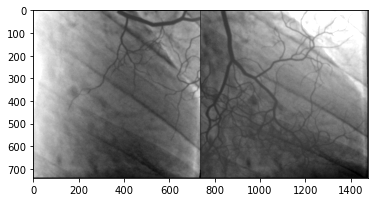

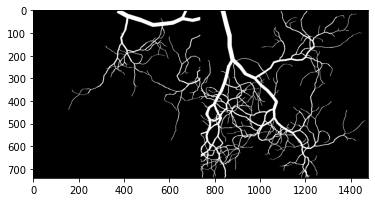

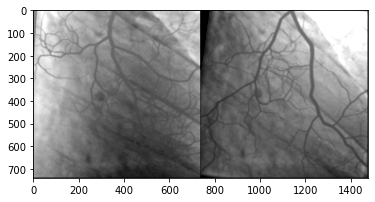

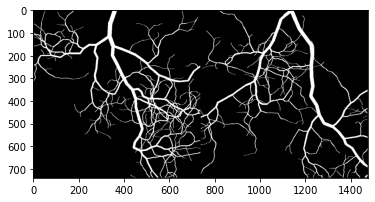

In [6]:
SynDataSet = SynData("syn_data/syn_input", "syn_data/syn_label")
test_loader = td.DataLoader(SynDataSet, batch_size=2, shuffle=True)

testIter = iter(test_loader)
for i in range(min(len(testIter), 10)):
    imgs, labs = next(testIter)
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.show()

Make our dataSet and it outputs data as expected

In [5]:
syn_data_path = r"C:\Users\nugni\OneDrive\Skrivebord\Bachelor\local_data\syn_data\syn_data"

In [6]:
#from torchvision.transforms import RandomRotation, RandomResizedCrop, RandomHorizontalFlip

#transformations = [RandomRotation(degrees=(-5, 5)), RandomResizedCrop(size=(736, 736), scale=(0.7, 0.9), ratio=(0.9, 1.1)), RandomHorizontalFlip(p=0.5)]

In [7]:
from torchvision.transforms import Resize
import torchvision

SynDataSet = SynData(syn_data_path + "/syn_input", syn_data_path + "/syn_label")#, transforms_both=transformations)
SynDataSetWRepeat = SynData(syn_data_path + "/syn_input", syn_data_path + "/syn_label", repeat_channels=True)

#Test we can retrieve data from Dataset
test, lab = SynDataSet[0]
print(test.shape)
print(lab.shape)


torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


Make, train, validation and test data set of synthetic data

In [8]:
SynTrainData, SynValData, SynTestData = td.random_split(SynDataSet, train_val_test_split_probs)

Visualize synthetic generated data

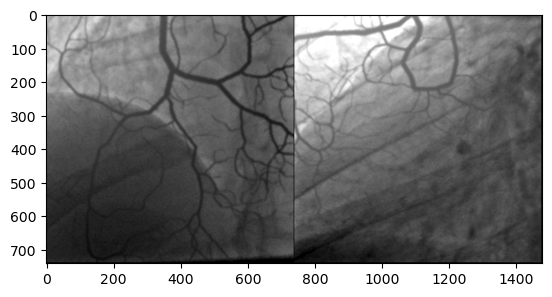

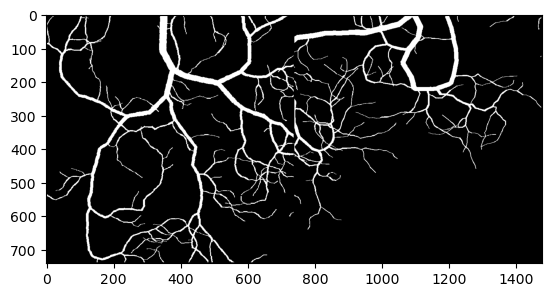

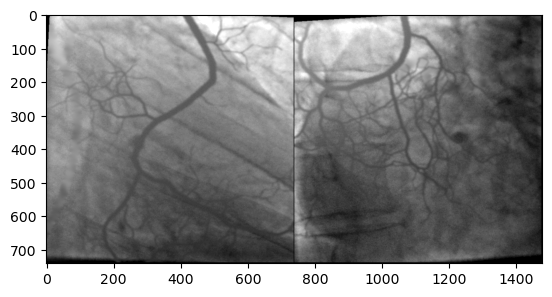

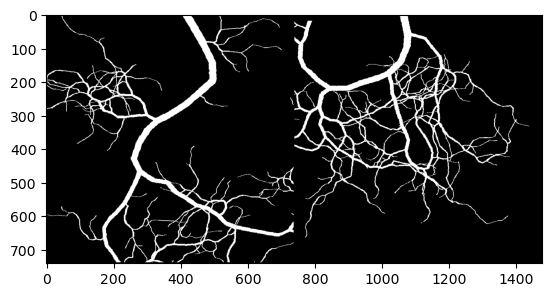

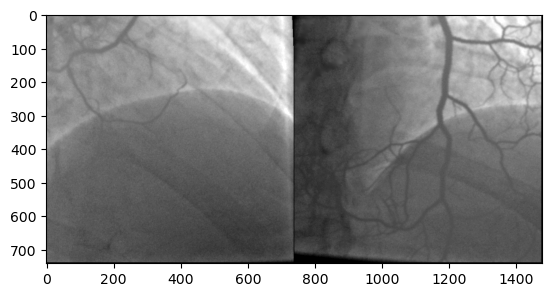

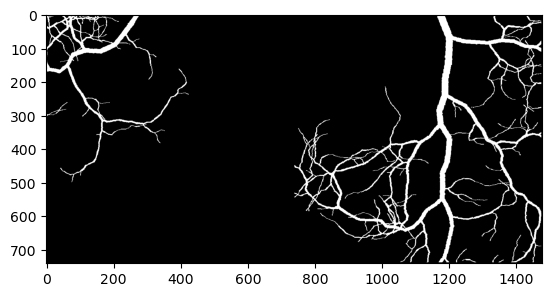

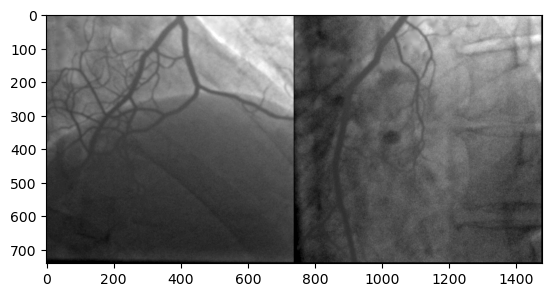

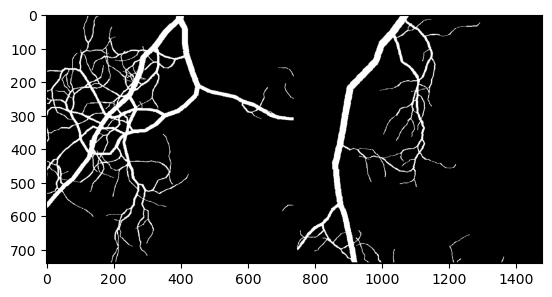

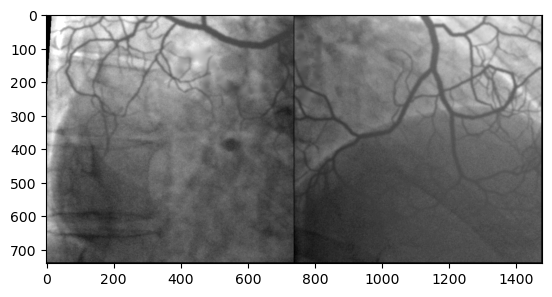

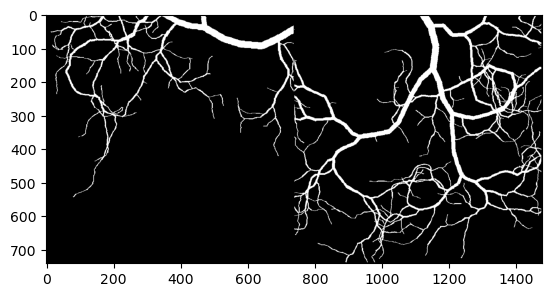

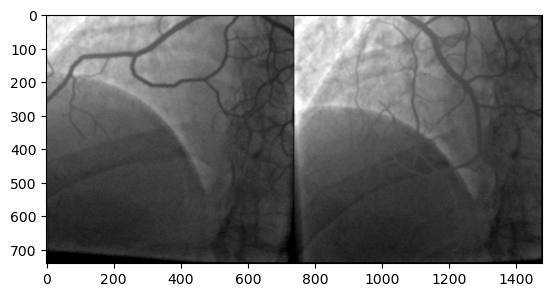

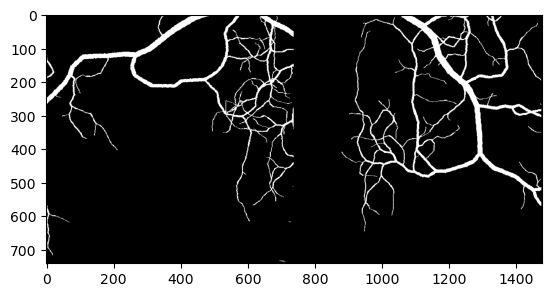

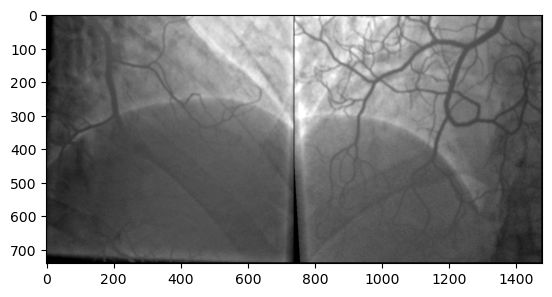

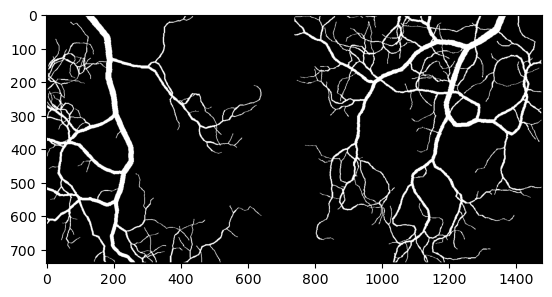

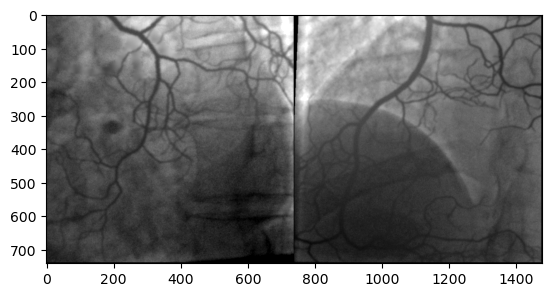

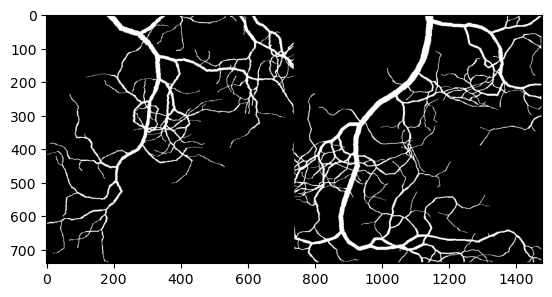

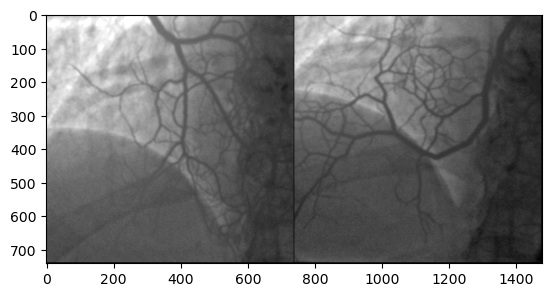

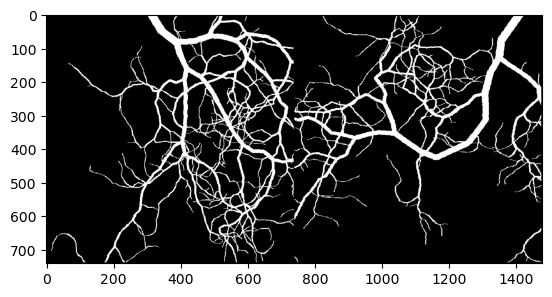

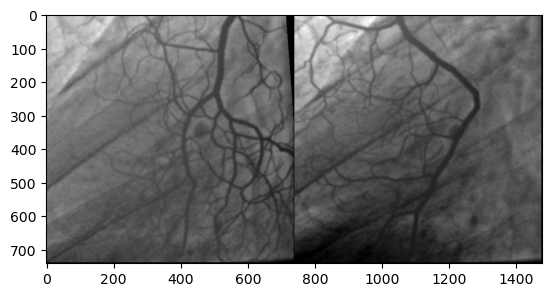

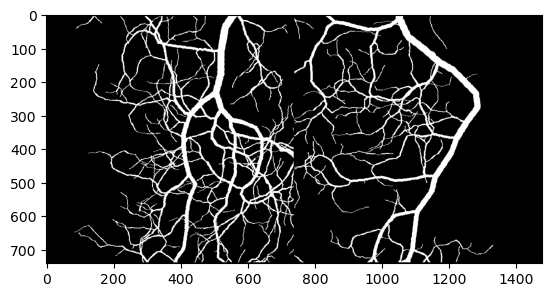

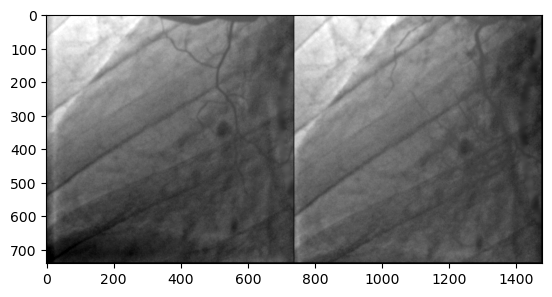

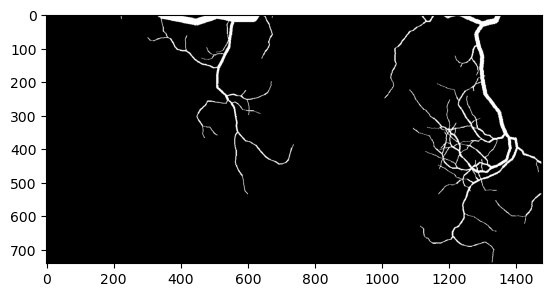

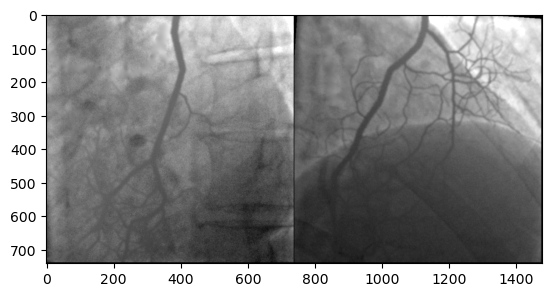

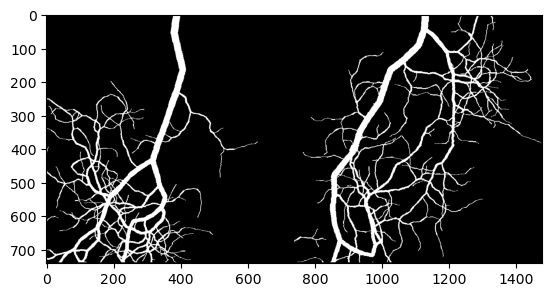

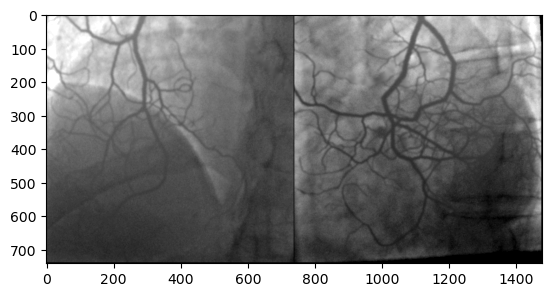

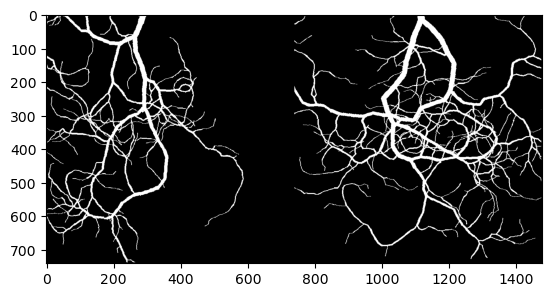

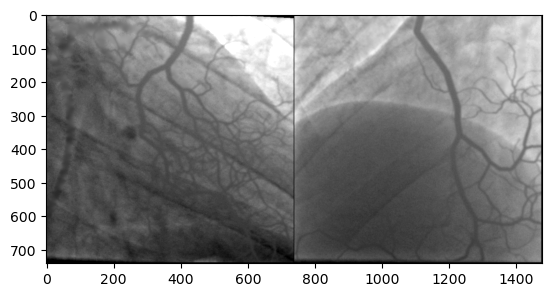

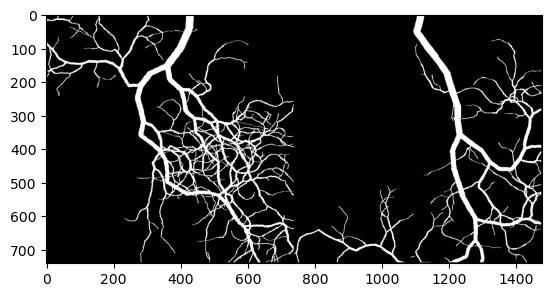

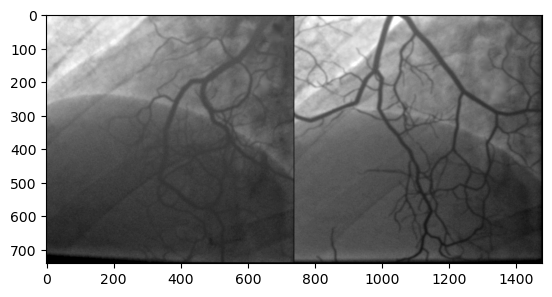

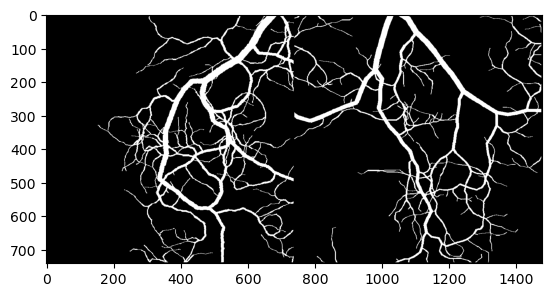

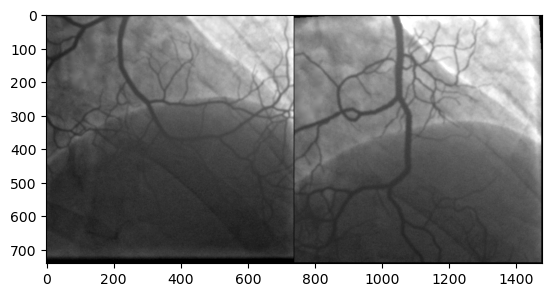

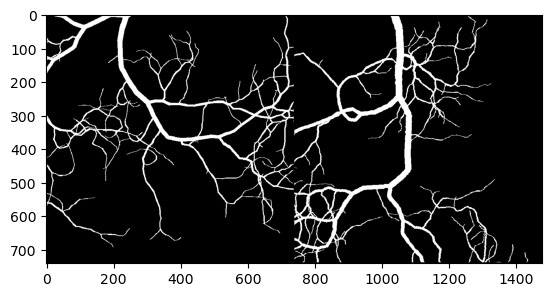

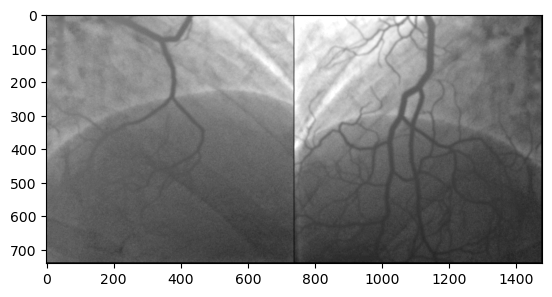

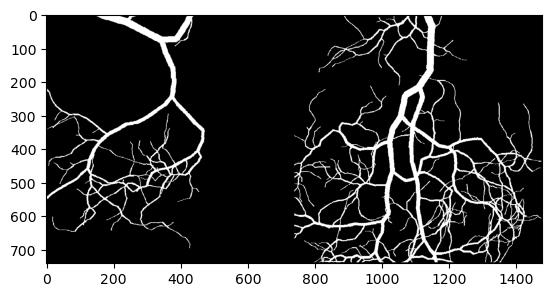

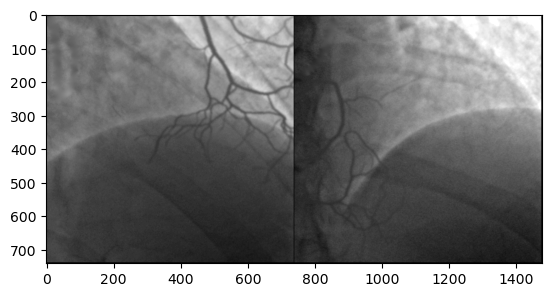

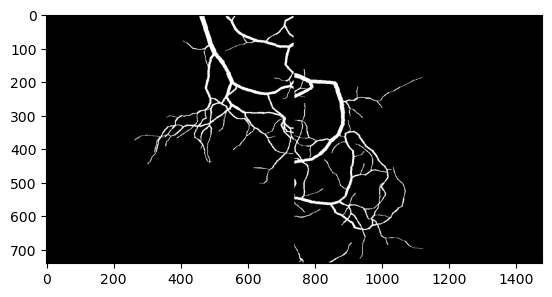

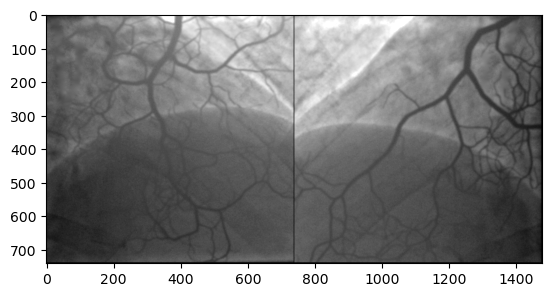

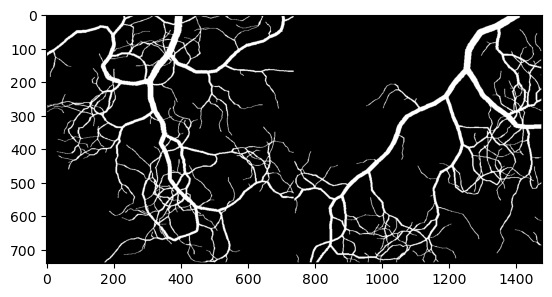

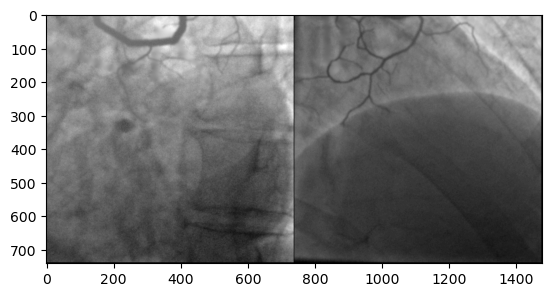

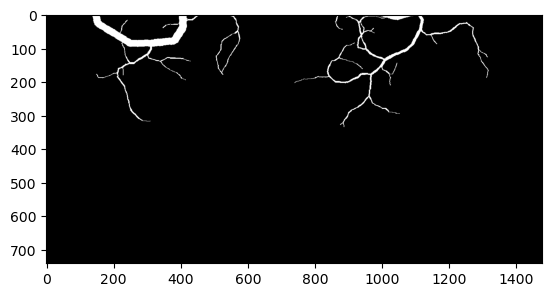

In [9]:
import torchvision

#test that dataloader works, and show images
test_loader = td.DataLoader(SynDataSet, batch_size=2, shuffle=True)

testIter = iter(test_loader)
for i in range(min(len(testIter), 20)):
    imgs, labs = next(testIter)
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.show()

In [8]:
#Test transformations work correctly on dataloader:
#from torchvision.transforms import RandomVerticalFlip, RandomHorizontalFlip, Resize, CenterCrop, Normalize
#from torchvision.transforms.functional import rotate
#import torchvision

#t_both = [RandomHorizontalFlip(p=0.5),  RandomVerticalFlip(p=0.5)]
#Maybe normalize imgs automatically in dataSet

In [9]:
#TransDataSet = SynData("SynData/synInput", "SynData/synLabel", transforms_both=t_both, repeat_channels=True)

Experiment with Basic Unet (to test whether it works)

Import packages and files for Unet and training

In [10]:
from Unet.UNetBasic import UnetBasic
import torch
import torch.optim as optim
import torch.nn as nn
import torch.cuda


In [11]:
#make Unet

net1 = UnetBasic()

#Try to use cuda machine

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#check which device we are on

print(device)


cuda:0


In [10]:
#SynTrainData = td.Subset(SynTrainData, np.arange(100))
#SynValData = td.Subset(SynValData, np.arange(50))

Make training and validation data

In [12]:
trainLoader = td.DataLoader(SynTrainData, batch_size=2, shuffle=True)
valLoader = td.DataLoader(SynValData, batch_size=2, shuffle=True)

Pretraining our basic Unet

In [13]:
from training_functionality import trainLoop

net1.to(device) #For now is cpu, but will hopefully be CUDA later
net1 = net1.float() #hack that should remove float error

#Adam for now
optimizer = optim.Adam(net1.parameters(), lr=0.001)
criterion = nn.BCELoss()
criterion.to(device)
epochs = 10

#Training, pray for me. Idea; only print av. epoch error. Decide later
trainLoss, valLoss, net = trainLoop(net1, optimizer, criterion, device, epochs, trainLoader, valLoader, print_interv=10)

[1,    10] loss: 0.390
[1,    20] loss: 0.334
[1,    30] loss: 0.278
[1,    40] loss: 0.276
[1,    50] loss: 0.250
[1,    60] loss: 0.220
[1,    70] loss: 0.213
[1,    80] loss: 0.194
[1,    90] loss: 0.137
[1,   100] loss: 0.206
[1,   110] loss: 0.207
[1,   120] loss: 0.177
[1,   130] loss: 0.137
[1,   140] loss: 0.144
[1,   150] loss: 0.163
[1,   160] loss: 0.140
[1,   170] loss: 0.112
[1,   180] loss: 0.145
[1,   190] loss: 0.072
[1,   200] loss: 0.089
[1,   210] loss: 0.115
[1,   220] loss: 0.174
[1,   230] loss: 0.133
[1,   240] loss: 0.135
[1,   250] loss: 0.104
[2,    10] loss: 0.134
[2,    20] loss: 0.145
[2,    30] loss: 0.116
[2,    40] loss: 0.106
[2,    50] loss: 0.085
[2,    60] loss: 0.094
[2,    70] loss: 0.162
[2,    80] loss: 0.117
[2,    90] loss: 0.133
[2,   100] loss: 0.121
[2,   110] loss: 0.111
[2,   120] loss: 0.082
[2,   130] loss: 0.088
[2,   140] loss: 0.102
[2,   150] loss: 0.145
[2,   160] loss: 0.093
[2,   170] loss: 0.115
[2,   180] loss: 0.070
[2,   190] 

Save model, such that we do not need to retrain

In [14]:
#save model
modelPath = "saved_models/"
UnetName = "FirstUnet"

#save model
torch.save(net.state_dict(), (modelPath + UnetName))

#Create unet
unetBasic = UnetBasic().to(device)
#load trained model's parameters into unet
unetBasic.load_state_dict(torch.load((modelPath + UnetName)))

<All keys matched successfully>

Visualize loss of Unet Training

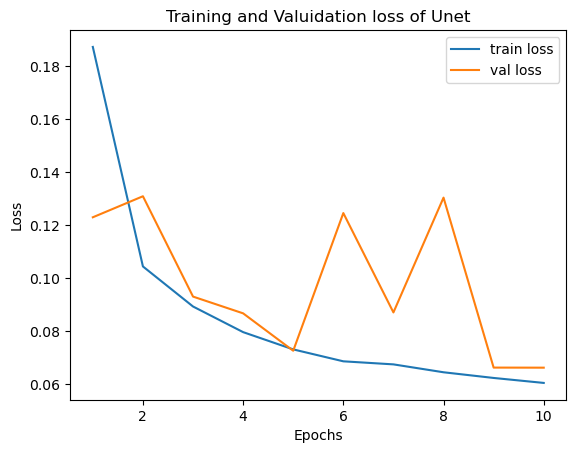

In [15]:
#from training_functionality import visualizeLoss #need to fix

plt.plot(np.arange(epochs)+1, trainLoss, '-', label="train loss")
plt.plot(np.arange(epochs)+1, valLoss, '-', label = "val loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Training and Valuidation loss of Unet")
plt.legend()
plt.show()
#visualizeLoss("Basic Unet", 0, trainLoss, valLoss)
#visualizeLoss("Basic Unet", 5, trainLoss[100:], testLoss[100:]) #something funky going on. Why does it stop at 1000 and not 1300??

Test Unet

actual label:


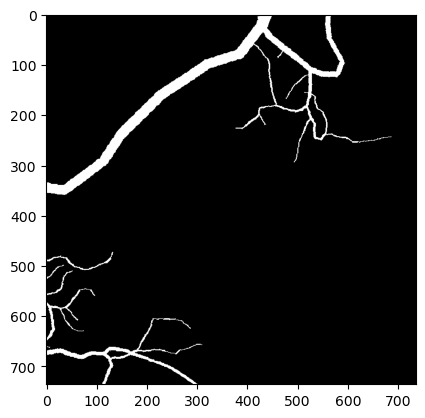

predicted lab:


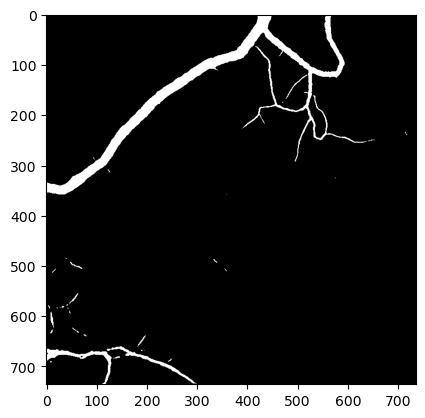

f1 score: 0.87823

actual label:


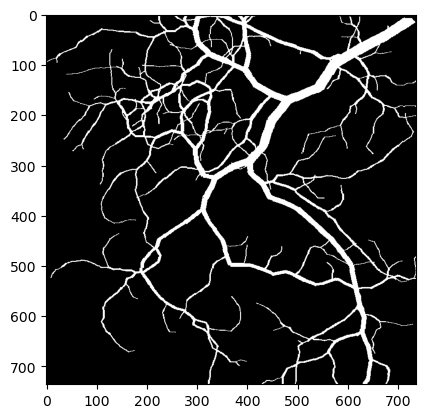

predicted lab:


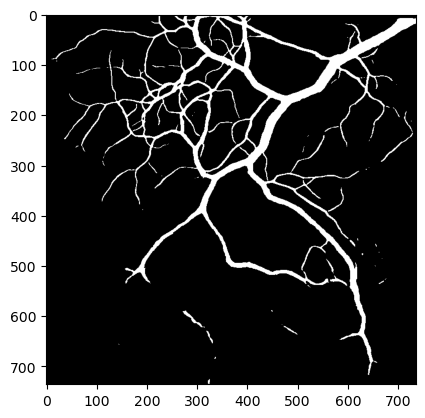

f1 score: 0.80156

actual label:


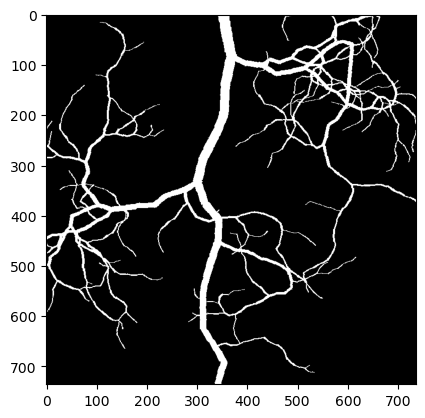

predicted lab:


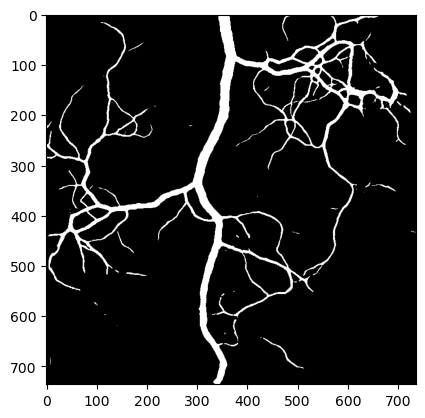

f1 score: 0.84141

Mean f1 score: 0.84040


In [16]:
from training_functionality import test_net

SynTestData = td.Subset(SynTestData, [0, 1, 2])

testLoader = td.DataLoader(SynTestData, shuffle=True)

test_net(unetBasic, testLoader, device, illustrate=True)

Train SegFormer.

First; get model

In [17]:
from transformers import SegformerForSemanticSegmentation

Define model

In [18]:
#https://keras.io/examples/vision/segformer/
#https://huggingface.co/docs/transformers/v4.26.1/en/main_classes/model#transformers.PreTrainedModel.from_pretrained
model_name = "nvidia/segformer-b3-finetuned-ade-512-512"
segModel = SegformerForSemanticSegmentation.from_pretrained(
    model_name,
    num_labels=2,       #Binær klassifikation
    ignore_mismatched_sizes=True, #do not raise an error if some of the weights from the checkpoint do not have the same size as the weights of the model
    reshape_last_stage=True #https://huggingface.co/transformers/v4.12.5/model_doc/segformer.html
    )

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b3-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.weight: found shape torch.Size([150, 768, 1, 1]) in the checkpoint and torch.Size([2, 768, 1, 1]) in the model instantiated
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Freeze all paramters instead of those in decoder for now. I.e. only train on decoder.

In [19]:
#Freeze parameters in entire model
for param in segModel.parameters():
    param.requires_grad = False

#Unfreeze decoder's parameters
for param in segModel.decode_head.parameters():
    param.requires_grad = True

#Unfreeze last layer's parameters
for param in segModel.segformer.encoder.block[3].parameters():
    param.requires_grad = True

Export model to device, and define optimizer

In [20]:
from transformers import AdamW
from tqdm import tqdm

epochs = 10

segModel.to(device)

optimizer = AdamW(segModel.parameters(), lr=0.00006) #model.parameters skal måske ændres??

criterion = nn.BCELoss()
criterion.to(device)

c:\Users\nugni\anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BCELoss()

In [21]:
SynTrainDataR, SynValDataR, SynTestDataR = td.random_split(SynDataSetWRepeat, [0.5, 0.25, 0.25])
#SynTrainDataR, SynValDataR, SynTestDataR = td.Subset(SynTrainDataR, np.arange(100)), td.Subset(SynValDataR, np.arange(50)), td.Subset(SynTestDataR, [0, 1, 2, 3])

In [22]:
trainLoaderR, valLoaderR, testLoaderR = td.DataLoader(SynTrainDataR, batch_size=2), td.DataLoader(SynValDataR, batch_size=2), td.DataLoader(td.Subset(SynTestDataR, np.arange(5)), batch_size=1)

Train the model. Dobble check that we train the parameters we think we train
https://stackoverflow.com/questions/70256003/how-can-i-only-train-the-classifier-and-freeze-rest-of-the-parameters-in-pytorch

In [23]:
losses = []
val_losses = []
for epoch in range(1, epochs+1):  # loop over the dataset multiple times
    print("Epoch:", epoch)
    pbar = tqdm(trainLoaderR)
    accuracies = []
    run_losses = []
    val_accuracies = []
    run_val_losses = []
    segModel.train()
    for idx, batch in enumerate(pbar):
        # get the inputs;
        pixel_values, labels = batch

        #transfer data to device, e.g. GPU
        pixel_values, labels = pixel_values.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = segModel(pixel_values=pixel_values.float(), labels=labels[:,0,:, :].long()) #Should not do anything bad

        # evaluate
        upsampled_logits = nn.functional.interpolate(outputs.logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
        predicted = upsampled_logits.argmax(dim=1)

        #mask = (labels != 255) # we don't include the background class in the accuracy calculation
        pred_labels = predicted.detach().cpu().numpy()
        true_labels = labels.detach().cpu().numpy()
        #accuracy = accuracy_score(pred_labels, true_labels)
        loss = outputs.loss
        #accuracies.append(accuracy)
        run_losses.append(loss.item())
        #pbar.set_postfix({'Batch': idx, 'Pixel-wise accuracy': sum(accuracies)/len(accuracies), 'Loss': sum(losses)/len(losses)})

        # backward + optimize
        loss.backward()
        optimizer.step()
    else:
        segModel.eval()
        with torch.no_grad():
            for idx, batch2 in enumerate(valLoaderR):
                pixel_values, labels = batch2

                #transfer data to device, e.g. GPU
                pixel_values, labels = pixel_values.to(device), labels.to(device)

                outputs2 = segModel(pixel_values=pixel_values.float(), labels=labels[:,0,:, :].long())
                upsampled_logits = nn.functional.interpolate(outputs2.logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
                predicted = upsampled_logits.argmax(dim=1)

                #mask = (labels != 255) # we don't include the background class in the accuracy calculation
                pred_labels = predicted.detach().cpu().numpy()
                true_labels = labels.detach().cpu().numpy()
                #accuracy = accuracy_score(pred_labels, true_labels)
                val_loss = outputs2.loss
                #val_accuracies.append(accuracy)
                run_val_losses.append(val_loss.item())
    losses.append(sum(run_losses)/len(run_losses))
    val_losses.append(sum(run_val_losses)/len(run_val_losses))
    print(f"Train Loss: {losses[epoch-1]}\
         Val Loss: {val_losses[epoch-1]}") #Tog 10 min før
    #print(f"Train Loss: {sum(losses)/len(losses)}\
    #     Val Loss: {sum(val_losses)/len(val_losses)}") #Tog 10 min før

Epoch: 1


100%|██████████| 250/250 [03:47<00:00,  1.10it/s]


Train Loss: 0.31789435863494875         Val Loss: 0.23305110812187194
Epoch: 2


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.1879190153479576         Val Loss: 0.18696718901395798
Epoch: 3


100%|██████████| 250/250 [03:42<00:00,  1.12it/s]


Train Loss: 0.15496893829107283         Val Loss: 0.1499010745882988
Epoch: 4


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.13542210844159125         Val Loss: 0.1346947872042656
Epoch: 5


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.12521645966172218         Val Loss: 0.12510176163911818
Epoch: 6


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.11708913625776768         Val Loss: 0.11809925818443298
Epoch: 7


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.11125049585103988         Val Loss: 0.11085507315397262
Epoch: 8


100%|██████████| 250/250 [03:42<00:00,  1.13it/s]


Train Loss: 0.1091099024116993         Val Loss: 0.10861072903871537
Epoch: 9


100%|██████████| 250/250 [03:42<00:00,  1.12it/s]


Train Loss: 0.10605416963994503         Val Loss: 0.10705998581647873
Epoch: 10


100%|██████████| 250/250 [03:41<00:00,  1.13it/s]


Train Loss: 0.10346979473531247         Val Loss: 0.10595719563961029


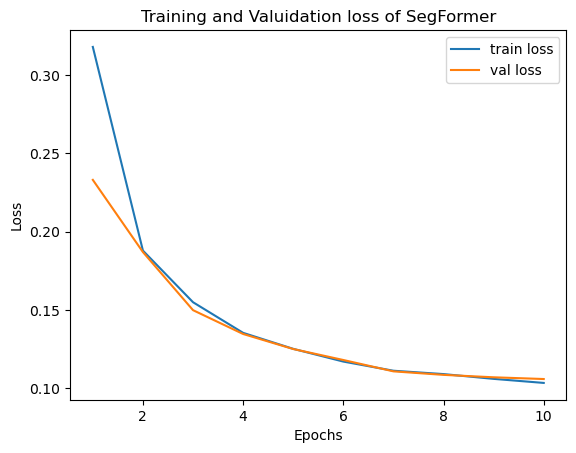

In [24]:
#visualizeLoss("Pretrained Segformer", 1, losses, val_losses)
plt.plot(np.arange(epochs)+1, losses, '-', label="train loss")
plt.plot(np.arange(epochs)+1, val_losses, '-', label = "val loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Training and Valuidation loss of SegFormer")
plt.legend()
plt.show()

Visualize results on test set

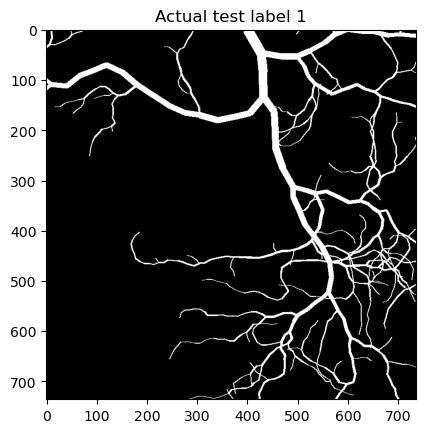

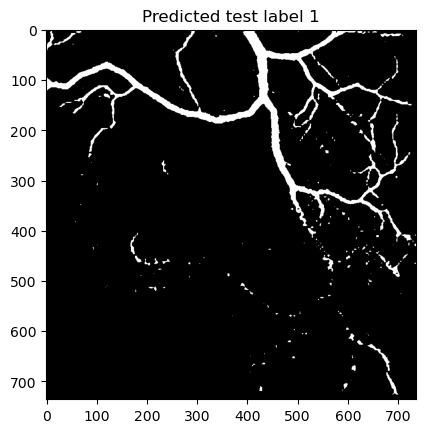

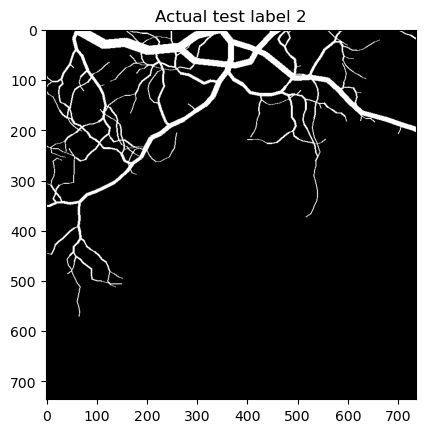

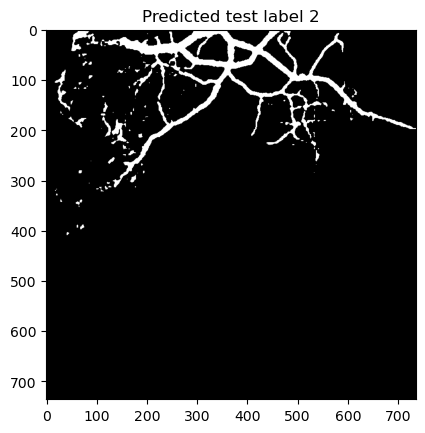

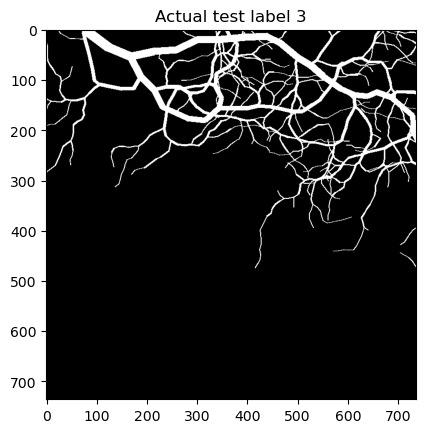

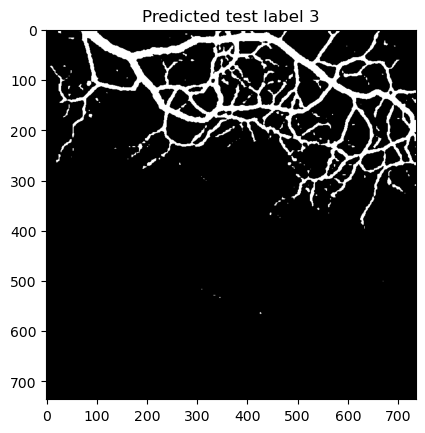

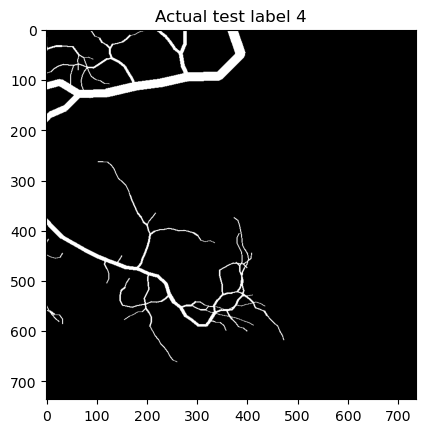

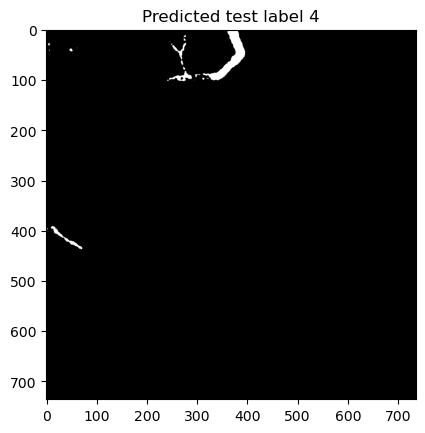

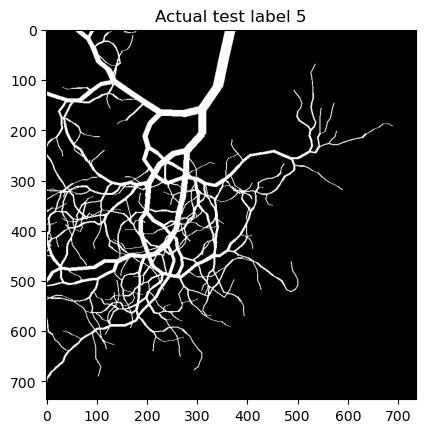

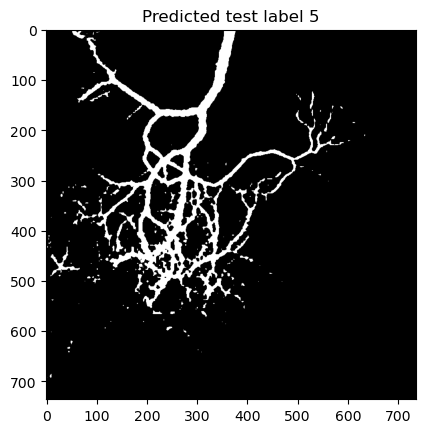

In [25]:

for idx, batch2 in enumerate(testLoaderR):
    img, lab = batch2
    outputs = segModel(pixel_values=img.to(device).float())
    upsampled_logits = nn.functional.interpolate(outputs.logits, size=lab.shape[-2:], mode="bilinear", align_corners=False)
    predicted = upsampled_logits.argmax(dim=1)

    plt.imshow(lab[0][0].numpy(), cmap="gray")
    plt.title("Actual test label {0}".format(idx+1))
    plt.show()
    plt.imshow(predicted[0].cpu().numpy(), cmap="gray")
    plt.title("Predicted test label {0}".format(idx+1))
    plt.show()

In [26]:
#save model
modelPath = "saved_models/"
UnetName = "FirstSegFormer"
#saveModel = False

#save model
torch.save(segModel.state_dict(), (modelPath + UnetName))

In [27]:
np.savetxt("Losses/Unet_train_loss.txt", np.array(trainLoss))
np.savetxt("Losses/Unet_val_loss.txt", np.array(valLoss))
np.savetxt("Losses/SegFormer_train_loss.txt", np.array(losses))
np.savetxt("Losses/SegFormer_val_loss.txt", np.array(val_losses))

In [ ]:
#model1 = SegformerForSemanticSegmentation.from_pretrained(
#    model_name,
#    num_labels=2,       #Binær klassifikation
#    ignore_mismatched_sizes=True, #do not raise an error if some of the weights from the checkpoint do not have the same size as the weights of the model
#    reshape_last_stage=True #https://huggingface.co/transformers/v4.12.5/model_doc/segformer.html
#    )
#
##load trained model's parameters into unet
#model1.load_state_dict(torch.load((modelPath + UnetName), map_location=torch.device('cpu')))
#
#model1.to(device)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b3-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.weight: found shape torch.Size([150, 768, 1, 1]) in the checkpoint and torch.Size([2, 768, 1, 1]) in the model instantiated
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)

Kill all files created in this session, such to diminish clutter

In [ ]:
#kill generated files such that we diminish clutter
#from synDataFunctionality.saveSynData import order_66

#order_66("SynDat/synInputTrain", "SynDat/synLabelTrain")